#### A. Construa um classificador linear, utilizando o classificador naive Bayes, para realizar a detecção dos símbolos QPSK.

##### a. Gere N = 1000000 símbolos QPSK aleatórios.

##### b. Passe os símbolos através de um canal AWGN. 

##### c. Detecte a probabilidade de erro de símbolo para cada um dos valores do vetor Es/N0 =  [-2, 0, 2, 4, 6, 8, 10,12, 14, 16, 18, 20].

##### d. Você pode utilizar o template abaixo para criar seu código.

In [1]:
# Importando as bibliotecas necessárais:
import numpy as np
import matplotlib.pyplot as plt

# Importando as bibliotecas ScikitLearn:
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
# Definição de quantas amostras:
N = 10000000

In [3]:
# Instanciação do Naiva Bayes Gaussiano:
nbg_real = GaussianNB()
nbg_imag = GaussianNB()

In [4]:
# Criação do vetor Es/N0:
EsN0dB = np.arange(-2,22,2)

In [5]:
# Criação dos vetores de Simulação e Teórico:
ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))

In [6]:
# LOOP
for idx in range(0, len(EsN0dB)):
    
    # Imprime o valor a cada LOOP
    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))

    # Geração de N valores QPSK:
    x = (2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0) + 1j*(2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0)
    
    # Normalização da energia para 1:
    s = (1/np.sqrt(2))* x;
    
    # Gera o vetor de RUÍDO:
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
    # Adiciona o ruído ao SINAL:
    y = s + np.sqrt(EsN0Lin)*noise
    
    # Separação em conjunto de teste e treinamento:
    x_real_test, x_real_train, y_real_test, y_real_train = train_test_split(x.real, y.real)
    x_imag_test, x_imag_train, y_imag_test, y_imag_train = train_test_split(x.imag, y.imag)
    
    # Treinamento do modelo:
    nbg_real.fit(y_real_train, x_real_train.ravel())
    nbg_imag.fit(y_imag_train, x_imag_train.ravel())
    
    # Predição da parte real e imaginária:
    x_real_detected = nbg_real.predict(y_real_test).reshape(len(y_real_test), 1)
    x_imag_detected = nbg_imag.predict(y_imag_test).reshape(len(y_imag_test), 1)
    
    # QPSK BER simulado:
    error_re = (x_real_test != x_real_detected)
    error_im = (x_imag_test != x_imag_detected)
    error = 0;
    
    for i in range(0, len(x_real_train)): 
        if(error_re[i]==True or error_im[i]==True): 
            error = error + 1
    
    ser_simu[idx] = 1.0 * error / len(x_real_train)
    
    # Theoretical BPSK BER.    
    ser_theo[idx] = erfc( np.sqrt(  0.5*(10.0**(EsN0dB[idx]/10.0))   ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0

Es/N0 dB: -2
Es/N0 dB: 0
Es/N0 dB: 2
Es/N0 dB: 4
Es/N0 dB: 6
Es/N0 dB: 8
Es/N0 dB: 10
Es/N0 dB: 12
Es/N0 dB: 14
Es/N0 dB: 16
Es/N0 dB: 18
Es/N0 dB: 20


B. Apresente um gráfico comparando a SER simulada e a SER teórica versus osvalores de Es/N0 definidos acima.

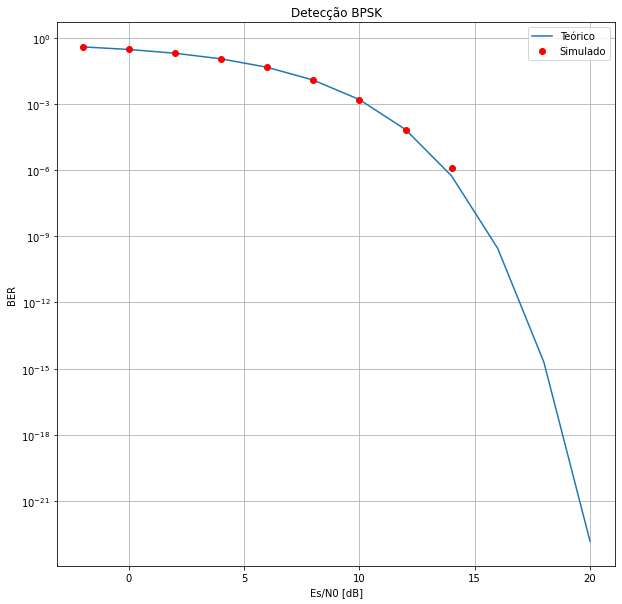

In [7]:
# Plotar Es/N0 vs BER values.
fig = plt.figure(figsize=(10,10))
plt.plot(EsN0dB, ser_theo, label='Teórico')
plt.plot(EsN0dB, ser_simu, 'ro', label='Simulado')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('BER')
plt.grid(True)
plt.title('Detecção BPSK')
plt.legend()
plt.savefig("bpsk_ber_curves.png", dpi=600)
plt.show()

###### C. Podemos dizer que a curva simulada se aproxima da curva teórica da SER?

Sim, aproxima de maneira muito boa! Porém tem aquilo né, ela se aproxima bem porque temos conhecimento do ruído como sendo gaussiano que possibilita que usemos a ferramente certa para o algorítmo.

###### D. Se as classes, ou seja, os símbolos, tivessem probabilidades diferentes, nós poderíamos dizer que o classificador ML é equivalente ao MAP?

Não, caso os simbolos tiverem uma probabilidade diferente não teria como afirmar que os dois são equivalentes.